In [16]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import aifc
import os
import tensorflow as tf
import random
import pandas as pd
from load_and_generate import *
import seaborn as sns
matplotlib.style.use('ggplot')

# Ground-truth

In [23]:
data_loc = '../moby/' 
train_folder = 'test'
#file_path = os.path.join(data_loc,train_folder) #change to test if desired

ground_truth = pd.read_csv(data_loc + '/result_mobi.csv', index_col= 5)
ground_truth.index.name

'file'

In [24]:
ground_truth.label.unique()

array([0, 1])

In [25]:
ground_truth.head(10)

,Unnamed: 0,pred,label,whale,nonwhale
file,,,,,
test1.aiff,0,0.000422,0,NaN,0.000422
test2.aiff,1,0.000324,0,NaN,0.000324
test3.aiff,2,0.003144,0,NaN,0.003144
test4.aiff,3,0.000293,0,NaN,0.000293
test5.aiff,4,0.005430,0,NaN,0.005430
test6.aiff,5,0.598998,1,0.598998,NaN
test7.aiff,6,0.897243,1,0.897243,NaN
test8.aiff,7,0.020521,0,NaN,0.020521
test9.aiff,8,0.016925,0,NaN,0.016925


In [26]:
df = pd.concat([ground_truth, pd.get_dummies(ground_truth.label)], axis=1); 
print(df.head(10))

whales = df[df[1]==1].index.values
no_whales = df[df[0]==1].index.values

             Unnamed: 0      pred  label     whale  nonwhale    0    1
file                                                                  
test1.aiff            0  0.000422      0       NaN  0.000422  1.0  0.0
test2.aiff            1  0.000324      0       NaN  0.000324  1.0  0.0
test3.aiff            2  0.003144      0       NaN  0.003144  1.0  0.0
test4.aiff            3  0.000293      0       NaN  0.000293  1.0  0.0
test5.aiff            4  0.005430      0       NaN  0.005430  1.0  0.0
test6.aiff            5  0.598998      1  0.598998       NaN  0.0  1.0
test7.aiff            6  0.897243      1  0.897243       NaN  0.0  1.0
test8.aiff            7  0.020521      0       NaN  0.020521  1.0  0.0
test9.aiff            8  0.016925      0       NaN  0.016925  1.0  0.0
test10.aiff           9  0.900128      1  0.900128       NaN  0.0  1.0


In [27]:
def convert_to_wav(file_name):
    import ffmpy
    ff = ffmpy.FFmpeg(inputs={file_name[:-5]+'.aiff': None}, outputs={file_name[:-5]+'.wav': ['-ar','8000']})
    ff.run()
    return file_name[:-5]+'.wav'
def remove_wav(file_name):
    os.remove(file_name)

Blue whales sounding... 

Blue whale 0 


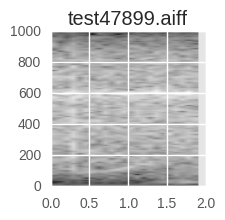

Blue whale 1 


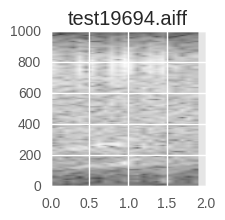

Blue whale 2 


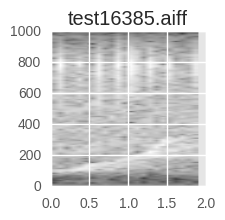

Blue whale 3 


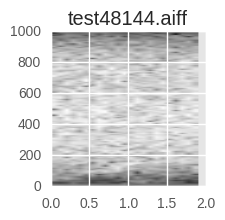

Blue whale 4 


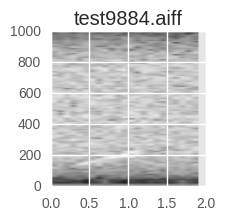

Blue whale 5 


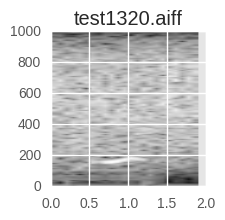

Blue whale 6 


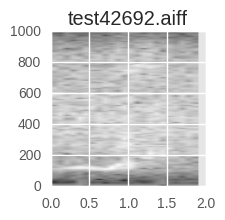

Blue whale 7 


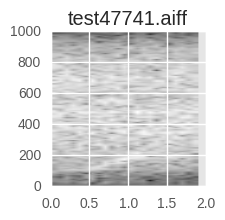

Blue whale 8 


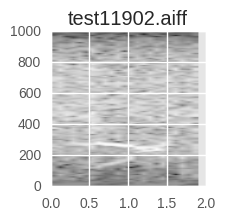

Blue whale 9 


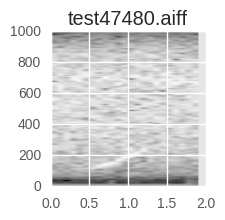

Blue whale 10 


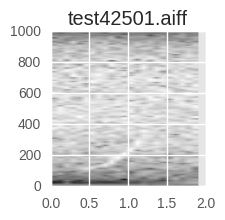

Blue whale 11 


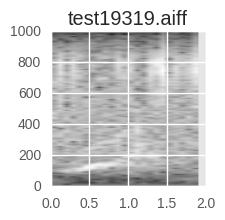

Blue whale 12 


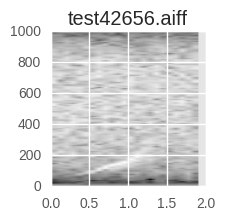

Blue whale 13 


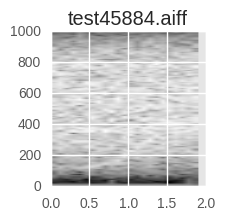

Blue whale 14 


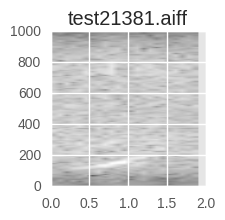



No blue whales sounding... 

Sound 0 


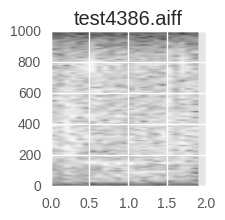

Sound 1 


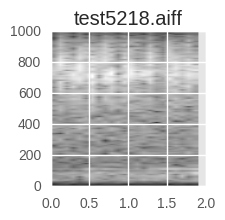

Sound 2 


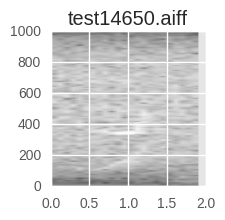

Sound 3 


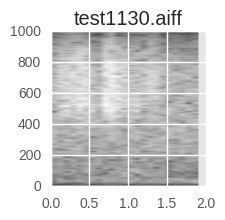

Sound 4 


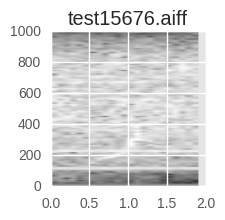

Sound 5 


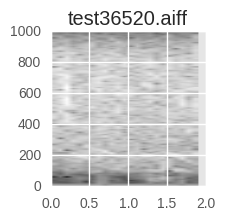

Sound 6 


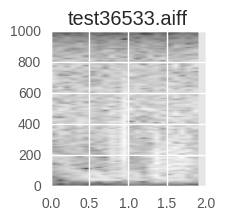

Sound 7 


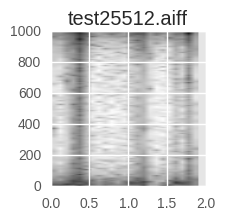

Sound 8 


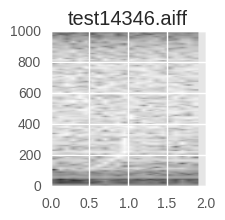

Sound 9 


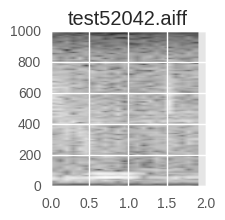

Sound 10 


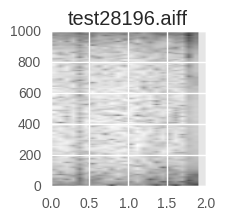

Sound 11 


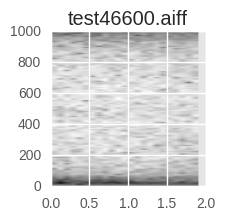

Sound 12 


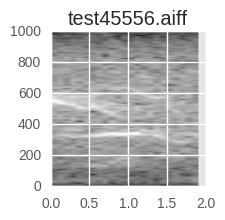

Sound 13 


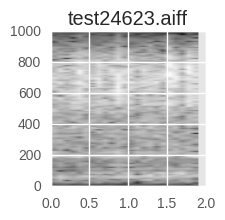

Sound 14 


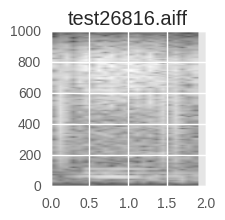

In [32]:
import soundfile as sf
import sounddevice as sd
N_play= 15

file_path= '../data/test'
print ("Blue whales sounding... \n")
for i, file_name in enumerate(random.sample(whales, N_play)):

    print ("Blue whale %d " %(i))
    
    f = aifc.open(file_path +'/'+ file_name, 'r')
    str_frames = f.readframes(f.getnframes())
    Fs = 2000
    time_data = np.fromstring(str_frames, np.short).byteswap()
    f.close()
 
    # spectrogram of file
    plt.figure(figsize=(2,2))
    Pxx, freqs, bins, im = plt.specgram(time_data,Fs=Fs,noverlap=90,cmap='gray')
    plt.title(file_name )
    plt.show()
    data, fs = sf.read(file_path +'/'+ file_name)
    sd.play(data, fs, blocking=True)

print('\n')
print ("No blue whales sounding... \n")    
for i, file_name in enumerate(random.sample(no_whales, N_play)):
    print ("Sound %d " %(i))
    f = aifc.open(file_path +'/'+ file_name, 'r')
    str_frames = f.readframes(f.getnframes())
    Fs = 2000
    time_data = np.fromstring(str_frames, np.short).byteswap()
    f.close()
 
    # spectrogram of file
    plt.figure(figsize=(2,2))
    Pxx, freqs, bins, im = plt.specgram(time_data,Fs=Fs,noverlap=90,cmap='gray')
    noise_power = 0.001 * Fs / 2
    plt.title(file_name )
    plt.show()
    data, fs = sf.read(file_path +'/'+ file_name)
    sd.play(data, fs, blocking=True)
    


In [14]:

g = sns.FacetGrid(df, col='pred')
g.map(plt.hist, "total_bill")

KeyboardInterrupt: 

ValueError: Image size of 16015500x300 pixels is too large. It must be less than 2^16 in each direction.